[[0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
11 15
y 7 15
[[1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
x 5 11
[[1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
16.0
1311 894
x 655 1311
y 447 894
x 327 655
y 223 447
x 16

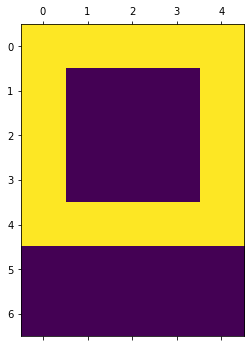

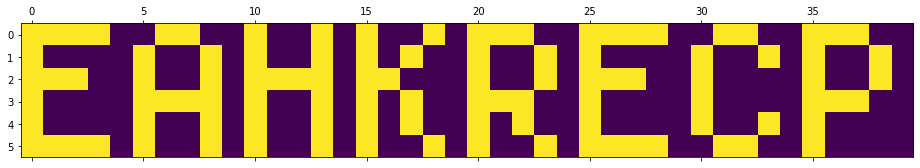

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class DAY_13:
    def __init__(self, fname, verbose=True):
        self.__fname = fname
        self.__verbose=verbose
        
    def read_input(self):
        coordinates = []
        self.__fold = []
        with open(self.__fname, "r") as f:
            cont = f.readlines()
            for line in cont:
                if line != "\n" and "fold" not in line: 
                    coordinates.append(np.array([int(line.split(",")[0]), int(line.split(",")[1])]))
                elif line != "\n" and "fold" in line:
                    if "x=" in line:
                        self.__fold.append(["x", int(line.split("=")[-1])])
                    elif "y=" in line:
                        self.__fold.append(["y", int(line.split("=")[-1])])
                        
        #Bestimme Dimension der initialen Matrix und befülle die Matrix
        coordinates = np.array(coordinates)
        #print(coordinates[1])
        self.__transparent = np.zeros((1+np.max(coordinates.T[0]),1+np.max(coordinates.T[1])))
        for coord in coordinates:
            self.__transparent[coord[0], coord[1]] = 1
        if self.__verbose: print(self.__transparent.T)
        print(len(self.__transparent), len(self.__transparent[1]))
        
    #Berücksichtige ungerade (eine Zeile wird ignoriert) und gerade (keine Zeile wird ignoriert) Matrizen
    def fold_transparent(self):
        for instr in self.__fold:
            if instr[0] == "x":
                j = 0 if len(self.__transparent)%2 == 1 else -1#Es muss instr[1]*2 == len(self.__transparent) sein
                for i in range(j, instr[1]): 
                    self.__transparent[i, :] += self.__transparent[-1-(i+j), :]
                print("x", instr[1], len(self.__transparent))
                self.__transparent = self.__transparent[:-1-(instr[1]+j), :]
                #    
            elif instr[0] == "y":
                j = 0 if len(self.__transparent[0])%2 == 1 else -1#Es muss instr[1]*2 == len(self.__transparent[0]) sein
                for i in range(j, instr[1]): 
                    self.__transparent[:, i] += self.__transparent[:, -1-(i+j)]
                print("y", instr[1], len(self.__transparent[0]))
                self.__transparent = self.__transparent[:, :-1-(instr[1]+j)]
            self.__transparent[self.__transparent > 1] = 1
            if self.__verbose: print(self.__transparent.T)
            
    def dots_visible(self):
        plt.matshow(self.__transparent.T, vmin=0, vmax=1)
        print(np.sum(self.__transparent))

    
day13_test_1 = DAY_13("example.txt")
day13_test_1.read_input()
day13_test_1.fold_transparent()
day13_test_1.dots_visible()

day13_puzzle_1 = DAY_13("input.txt", False)
day13_puzzle_1.read_input()
day13_puzzle_1.fold_transparent()
day13_puzzle_1.dots_visible()